# Interactive Gradient-Descent in Python

## Try me
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ffraile/operations-research-notebooks/blob/main/docs/source/NLP/tutorials/Interactive%20Gradient%20Descent.ipynb)[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/ffraile/operations-research-notebooks/main?labpath=docs%2Fsource%2FNLP%2Ftutorials%2FInteractive%20Gradient%20Descent.ipynb)

## Introduction
Gradient-Descent (GD) methods are in the backbone of many machine learning methods. in this tutorial, we will use a practical example to illustrate how the simplest algorithm in the family (Simple Gradient Descent) works.


## Import libraries
Before we dive into GD methods, let's import the libraries that we will use in this tutorial:

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


## Problem definition
Gradient-Descent methods allow us to find the maximum or minimum of a function that depends on an array of variables:

$$x = [x_1, x_2, ..., x_n]$$

For minimization, we want to find the minimum value of a function of x: 

$$\min z = f(x)$$

And similarly, for maximization, we want to find the maximum value of the function in x:

$$\max z = f(x)$$

### Tutorial Example
In this tutorial, as an example, let us find the maximum of the following function:

$$\max z = f(x) = (8-x_1)*x_1 + (16-x_2)*x_2$$

Note that it is a quadratic expression, probably the simplest form of non-linear function. We have chosen this function because it is realively easy to analyze, so we will use it to get insights on Gradient descent methods. 

#### Implementing the function in Python
The following Python function returns this value, given that you pass $x$ as an list or array:

In [ ]:
def my_func(x):
  # This is the function to optimize. 
  # x is an array containing the dependent variables to optimize (x = [x_1, x_2, ..., x_n])
  # By default this is the function used in the example, 
  # but you can change it if you want to analyze other examples
  return (8-x[0])*x[0] + (16-x[1])*x[1]


Now, let's plot it to get a general idea of how the function looks like. The following script represents a contour plot of the function:

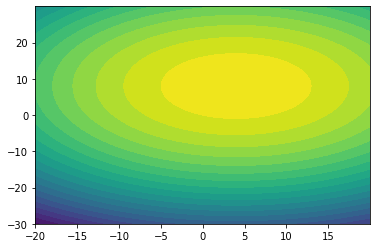

In [ ]:
x_1 = np.arange(-20, 20, 0.01) # The horizontal axis of the contour plot, it will represent x_1
x_2 = np.arange(-30, 30, 0.01) # The vertical axis of the contour plot, it will represent x_1
xx, yy = np.meshgrid(x_1, x_2, sparse=True) # This is a 2D grid of points where the function wil be evaluated
z = my_func([xx, yy]) #  We then calculate function z 
h = plt.contourf(x_1,x_2,z,levels=20)

The yellow area shows the values that are greater. From calculus, we know that the maximum is found at $x^*$ such that: 

$$\nabla f(x^*) = [0, ..., 0]^T$$

In this example the gradient is a vector of length 2: 
$$\nabla f(x) = [8-2*x_1, 16-2*x_2]^T$$

We can easily find the solution analytically with a linear system of equations, one equation for each component of the gradient: 

$$8-2*x_1 = 0$$
$$16-2*x_2 = 0$$

So, the maximum is found at: 

$$x_1 = 4$$
$$x_2 = 8$$

However, in many applications, particularly in machine learning, it is computationally expensive (we would need a lot of computational resources) to find the solution of $\nabla f(x^*) = [0, ..., 0]^T$ analytically. In those cases, gradient-descent methods are a very efficient solution to find an approximate solution. 

The strategy of GD methods is based on the following, it is expensive to find the value of x where the gradient is zero, but it is easy (in computational terms) to compute the value of the gradient for any value of x (e.g. $x'$). Now, if the value of the gradient at $x'$ is sufficiently small (for instance, smaller than an arbitrary error $\epsilon$ in absolute value, $|\nabla f(x')| \leq [\epsilon, ..., \epsilon]^T$, then we can consider that it is a good estimate of the maximum! 

For instance, the steepest method starts at an initial $x'$, and iteratively, updates this value as: 

$$x'' = x' + t*\nabla f(x')$$

where t is a parameter known as the **learning rate**. The gradient is a vector that tells us the direction of **maximum change** of the function, so the algorithm takes a step in this direction at every iteration (a step of size t). When the gradient is "reasonably close to zero", the algorithm has found an approximation, and if not, it tries updating the value again, making x' = x'' and repeating the calculation above. Intituively, think that you are in a mountain, and you want to get to the top, but the mountain is really high, and there are trees around you, so you do not really know how to get there. However, at every step, you can move in the direction where the slope is steepest. This is what the simple gradient descent algorithm does. Note that since it is a maximization problem (and we want to get to the top of the mountain), we update x with a positive increment in the direction of the gradient. For **minimization**, we would update with a negative increment ($x'' = x' - t*\nabla f(x')$).



#### Define the gradient
Ok, to make things simple and easy to update, let us define another Python function to calculate the gradient. This function will take an array as ($x=[x_1, x_2, ..., x_3]$ and return an array with the gradient of the function. By default it will compute $\nabla(x) = [\frac{\delta f(x)}{\delta x_1}, \frac{\delta f(x)}{\delta x_2}] = [-2*x_1 + 8, -2*x + 16]$, but you can update it if you would like to test some other function.

In [ ]:
def gradient_func(x):
  
  # This function returns the gradient as a Numpy array.
  # y will contain the gradient, we initiliaze it as a zero array. 
  # since x has two components, x_1 and x_2, we initialize it as an array 
  # with two members:
  y = [0, 0]
  # This is the gradient of the function (8-x_1)*x_1+(16-x_2)*x_2 
  # Here we have the first component of the gradient (-2*x_1 +8)
  y[0] = -2*x[0]+8
  # And here the second component (-2*x_2 + 16):
  y[1] = -2*x[1]+16
  return np.array(y)



    

#### Gradient descent function
Ok, now, let us program another function in Python to run the Simple Gradient Descent algorithm. This function takes the following parameters: 

- **start:** The starting value of x'. This is where our hike to the top (or bottom) of the mountain starts. 
- **learn_rate:** The learning rate t, or the size of the steps that we are going to take. 
- **max_iter:** Maximum number of iterations, to control that we do not enter and endless loop (or an endless hike..)
- **tol**: This is the tolerance, or the maximum error in the approximation of the gradient $\epsilon$. In other words, how close we want to get to the actual top of the mountain. This parameter is optional and by default takes the value 0.01
- **sense**: This is the sense or type of optimization problem. By default the sense is "max" for maximization problem (to hike uphill to the top of the mountain. You can use ```sense="min"``` for a minimization problem. 
- **gradient**: This is a function that computes the gradient, by default is the function ```gradient_func``` we have defined before. 

The algorithm will return: 
- **iterations**: An array that contains the value of x and the error at every iteration. 

In [ ]:
def gradient_descent(start, learn_rate, max_iter, tol =0.01, sense="max", gradient=gradient_func):
    iterations = [] #let´s keep track of all iterations in a dict
    x = start
    for i in range(max_iter):
      g = gradient(x)
      error = np.absolute(np.array(g))
      iterations.append([np.copy(x), np.copy(error)]) #Append to the iteration, a copy of the value and the error obtained

      tolerance = tol*np.ones(error.shape)
      if np.all(error <= tol): #If we are below tolerance exit the for loop
        break
      step = learn_rate*g
      if sense == "max":
        x += learn_rate*g
      else:
        x -= learn_rate*g
    return iterations


#### Testing the gradient descent
Ok, let´s test the algorithm starting at $x = [x_1, x_2] = 0$, and use $t = 0.147$ and $epsilon = 0.1$. We will then show the result iterations in a Pandas dataframe so that we can visualize the results in a table.

In [ ]:
## These are the parameters for the Simple Gradient Descent
start_point = np.array([0.0, 0.0])
t = 0.25
tolerance = 0.1

# Let us compute the iterations
iter = gradient_descent(start_point, t, max_iter=100, tol=tolerance)

# Now, let´s plot the info in a dataframe
pd.DataFrame(iter, columns= ["X", "error"])



,X,error
0,"[0.0, 0.0]","[8.0, 16.0]"
1,"[2.0, 4.0]","[4.0, 8.0]"
2,"[3.0, 6.0]","[2.0, 4.0]"
3,"[3.5, 7.0]","[1.0, 2.0]"
4,"[3.75, 7.5]","[0.5, 1.0]"
5,"[3.875, 7.75]","[0.25, 0.5]"
6,"[3.9375, 7.875]","[0.125, 0.25]"
7,"[3.96875, 7.9375]","[0.0625, 0.125]"
8,"[3.984375, 7.96875]","[0.03125, 0.0625]"


Ok, let us visualize the result in a countour graph. We are going to use red arrows to represent how the different iterations converge to the maximum. Each red arrow starts at x' and stops at x'' (x' ⇒ x'').

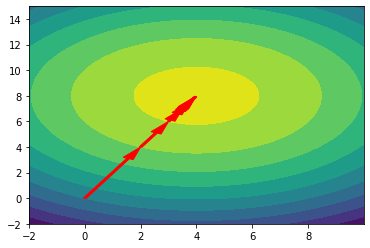

In [ ]:
x_1 = np.arange(-2, 10, 0.01)
x_2 = np.arange(-2, 15, 0.01)
xx, yy = np.meshgrid(x_1, x_2, sparse=True)
z = my_func([xx, yy])
h = plt.contourf(x_1,x_2,z,levels=10)
for i in range(1,len(iter)):
  start_point = iter[i-1][0]
  end_point = iter[i][0]
  plt.arrow(start_point[0], start_point[1], end_point[0] - start_point[0], end_point[1] - start_point[1], 
          color='red', width=0.1, head_width=0.4, head_length=1, length_includes_head=True)

plt.show()

# Questions

1.   Repeat the experimentation with lower tolerances values and note how the number of iterations increases. For instance, try to modify the script to achieve a tolerance of 0.01. How many iterations did the algorithm need, and what is the difference in the estimated x with respect to the previous experiment. What if you decrease it to 0.001?
2.   What happens with the distances between iterations as we get closer to the maximum? Can you reason why this happens?
3. Let us experiment now with the learning rate t. Let us set the tolerance back to 0.1 and test the script above with a learning rate of 0.25. Is convergence faster (in less iterations)? Try it now with a value of 1. Did the algorithm find an optimal solution? What about 0.5? What can we say about the sensitivity of the algorithm to changes in the learning rate?
4. We know where the maximum solution is. Can we use the second partial derivative test generalization to know if it is a local maximum or minimum?
5. Can you repeat the experiment for another function, for instance, minimize $z = f(x) = 2*x_1^2 + x_2^2 - 10*(x_1 + x_2)$?


